In [85]:
# NYC yellow taxi trip EDA by Yogesh Chauhan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns 

In [3]:
df=pd.read_csv('Yellow_Taxi_Trip_Data.csv')

In [4]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [6]:
df.size

408582

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [8]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [9]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

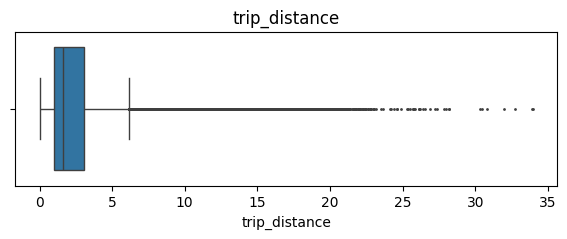

In [10]:
plt.figure(figsize=(7,2))
plt.title('trip_distance')
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1);

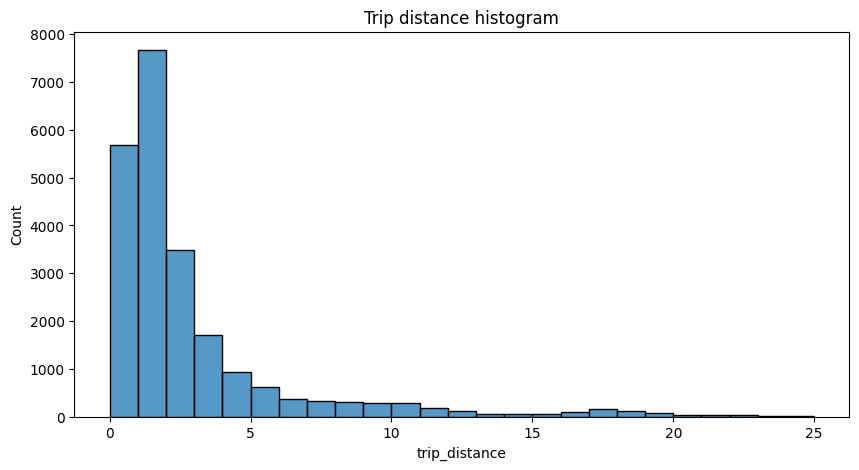

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins=range(0,26,1))
plt.title('Trip distance histogram');

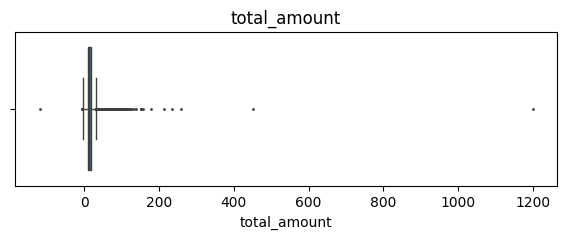

In [12]:
plt.figure(figsize=(7,2))
plt.title('total_amount')
sns.boxplot(x=df['total_amount'], fliersize=1);

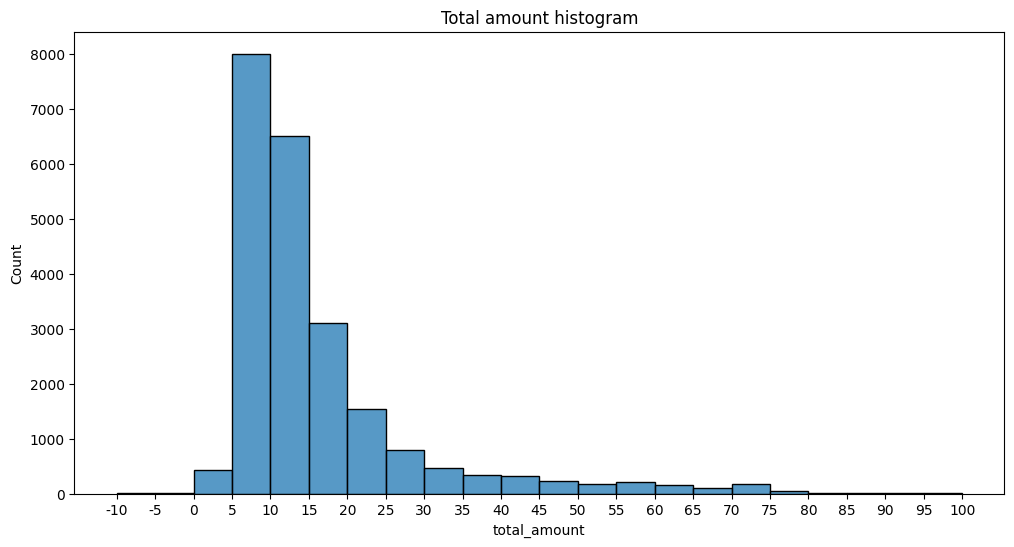

In [13]:
plt.figure(figsize=(12,6))
ax = sns.histplot(df['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('Total amount histogram');

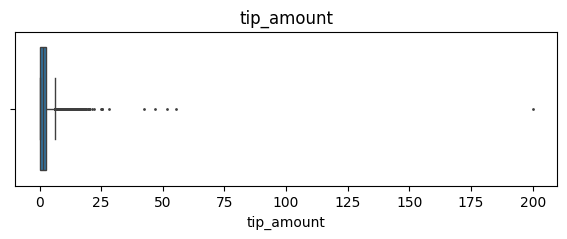

In [14]:
plt.figure(figsize=(7,2))
plt.title('tip_amount')
sns.boxplot(x=df['tip_amount'], fliersize=1);

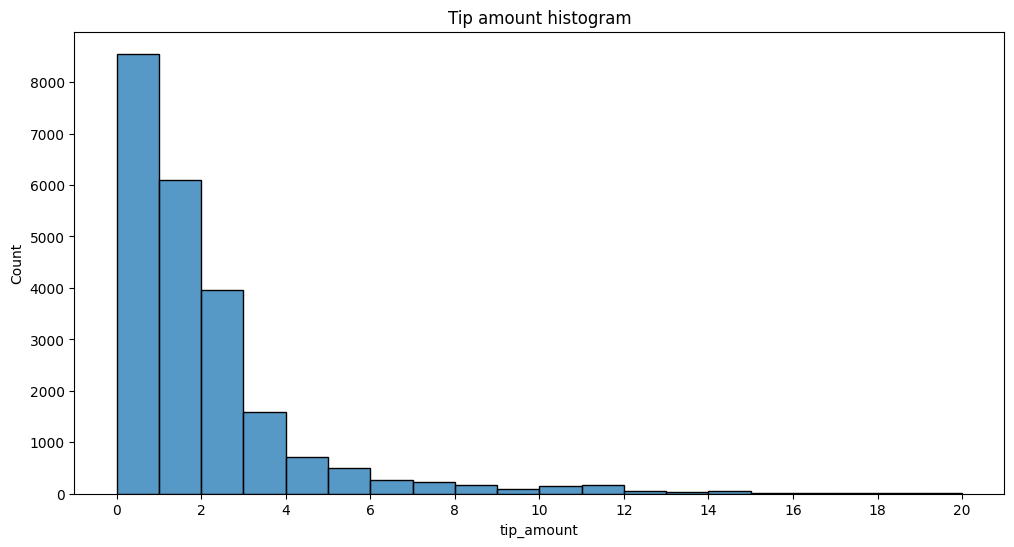

In [15]:
plt.figure(figsize=(12,6))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount histogram');

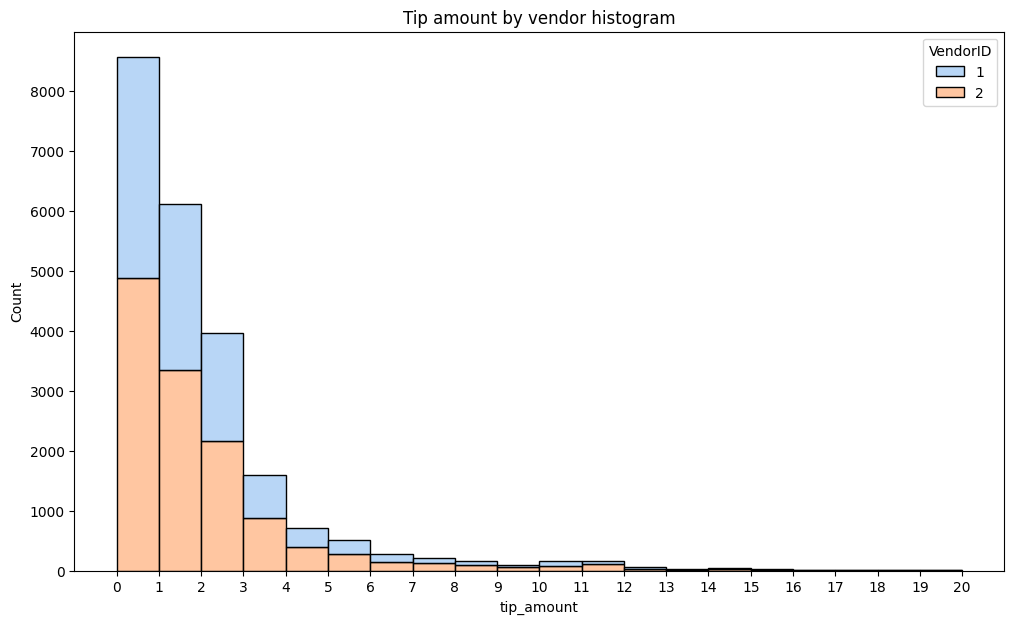

In [16]:
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram');

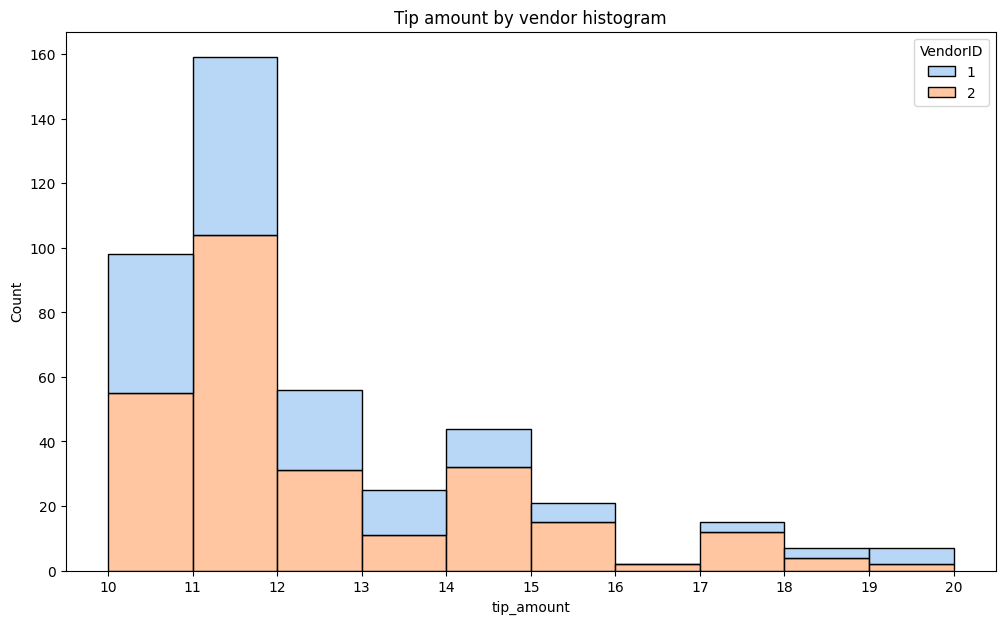

In [17]:
tips_over_ten = df[df['tip_amount'] > 10]
plt.figure(figsize=(12,7))
ax = sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by vendor histogram');

In [18]:
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

In [26]:
mean_tips_by_passenger_count = (
    df.groupby('passenger_count')['tip_amount']
    .mean()
    .reset_index()
    .rename(columns={'tip_amount': 'mean_tip'})
)

In [27]:
mean_tips_by_passenger_count

,passenger_count,mean_tip
0,0,2.135758
1,1,1.848920
2,2,1.856378
3,3,1.716768
4,4,1.530264
5,5,1.873185
6,6,1.720260


C:\Users\Chetna Chauhan\AppData\Local\Temp\ipykernel_15684\3510627564.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\Chetna Chauhan\AppData\Local\Temp\ipykernel_15684\3510627564.py:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(


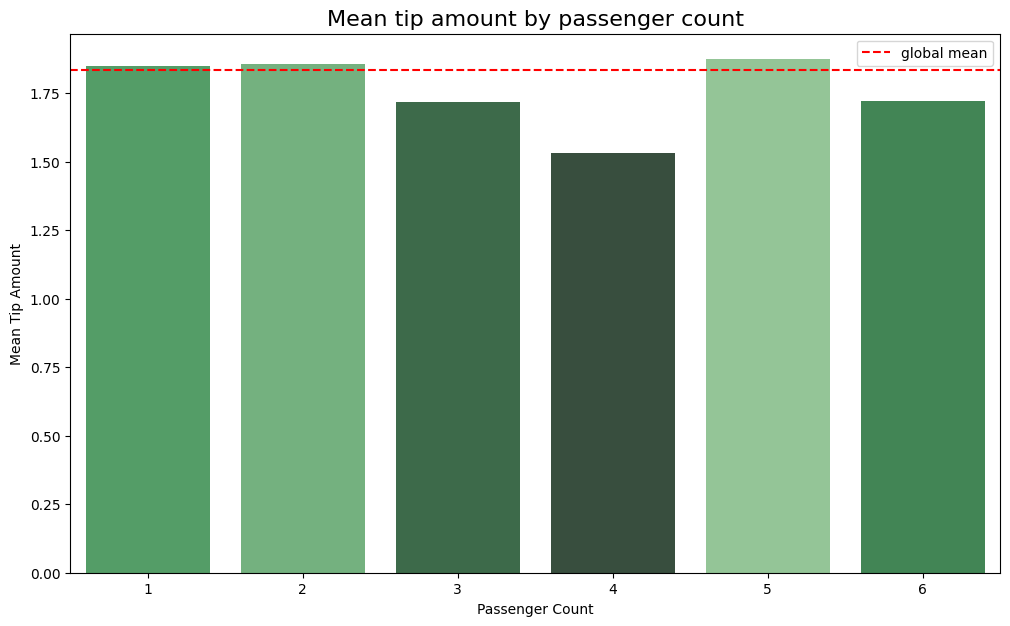

In [29]:
data = mean_tips_by_passenger_count.tail(-1)  # optionally skip the 0 or 1-passenger row
pal = sns.color_palette("Greens_d", len(data))
rank = data["mean_tip"].argsort().argsort()

plt.figure(figsize=(12,7))
ax = sns.barplot(
    x="passenger_count",
    y="mean_tip",
    data=data,
    palette=np.array(pal[::-1])[rank]
)
ax.axhline(df["tip_amount"].mean(), ls="--", color="red", label="global mean")
ax.legend()
plt.title("Mean tip amount by passenger count", fontsize=16)
plt.xlabel("Passenger Count")
plt.ylabel("Mean Tip Amount")
plt.show()


In [30]:
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

In [31]:
monthly_rides = df['month'].value_counts()
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

In [32]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

C:\Users\Chetna Chauhan\AppData\Local\Temp\ipykernel_15684\277831587.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_order)


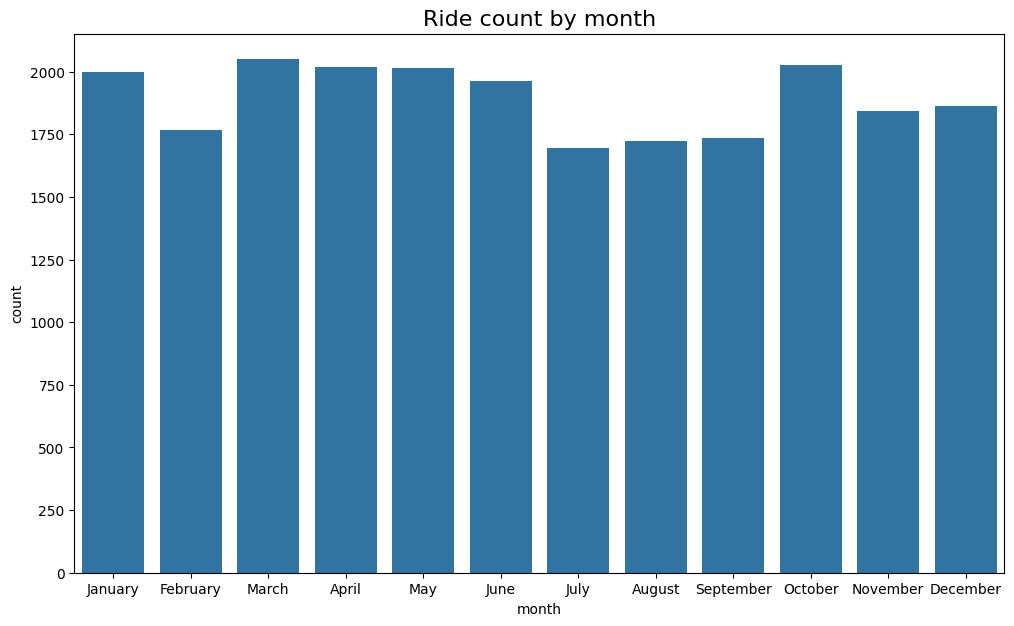

In [55]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_xticklabels(month_order)
plt.title('Ride count by month', fontsize=16);

In [34]:
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

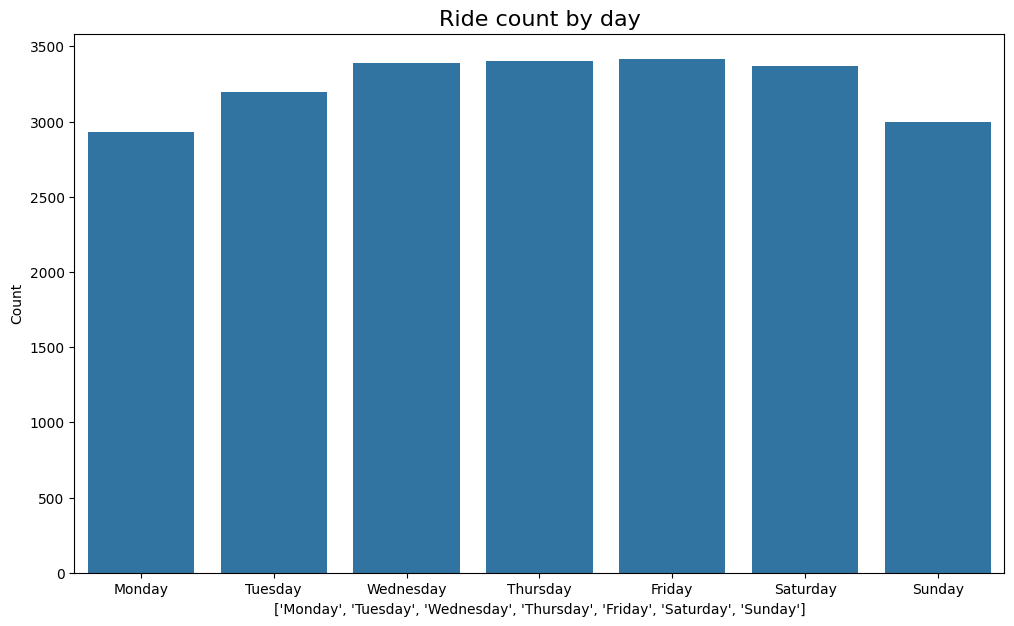

In [61]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index, y=daily_rides)
ax.set_xlabel(day_order)
ax.set_ylabel('Count')
plt.title('Ride count by day', fontsize=16);

In [44]:
total_amount_day = df.groupby('day')[['total_amount']].sum()
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


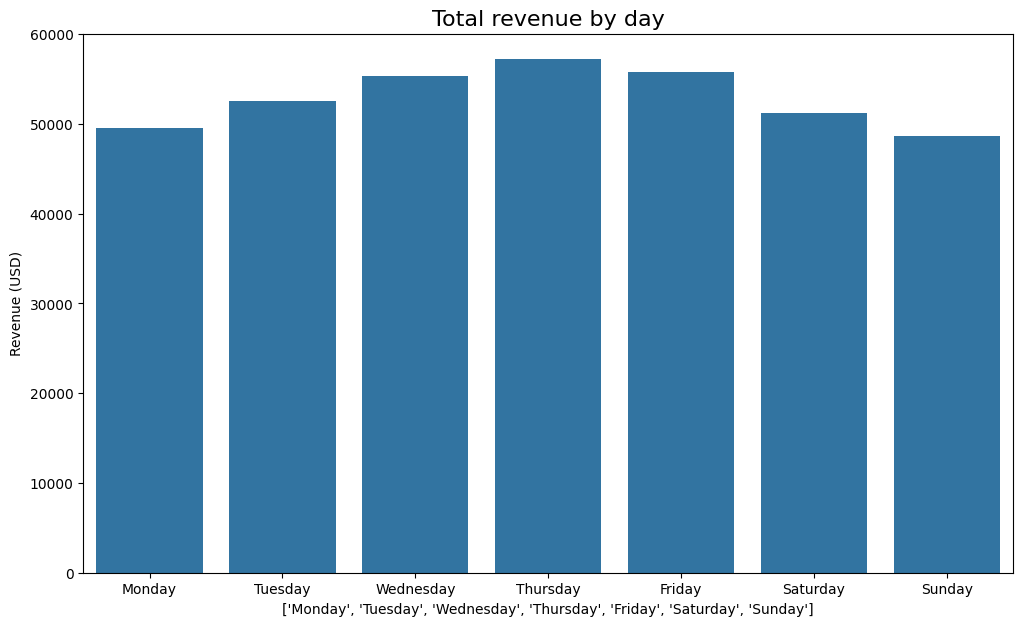

In [60]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'])
ax.set_xlabel(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day', fontsize=16);

In [58]:
total_amount_month = df.groupby('month')[['total_amount']].sum()
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


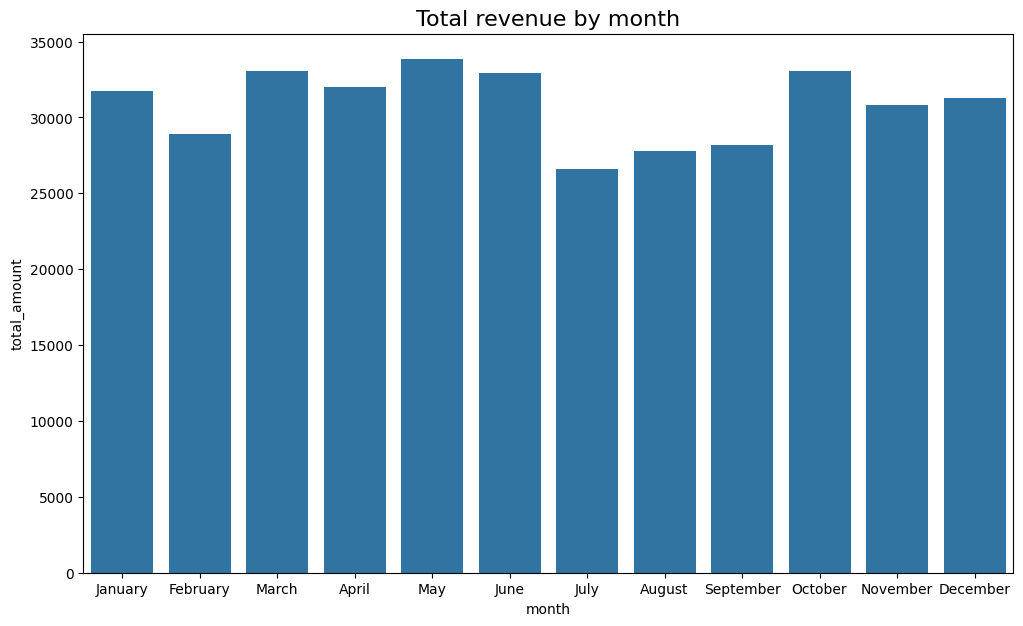

In [59]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'])
plt.title('Total revenue by month', fontsize=16);

In [62]:
df['DOLocationID'].nunique()

216

In [64]:
distance_by_dropoff = df.groupby('DOLocationID')[['trip_distance']].mean()
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff 

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


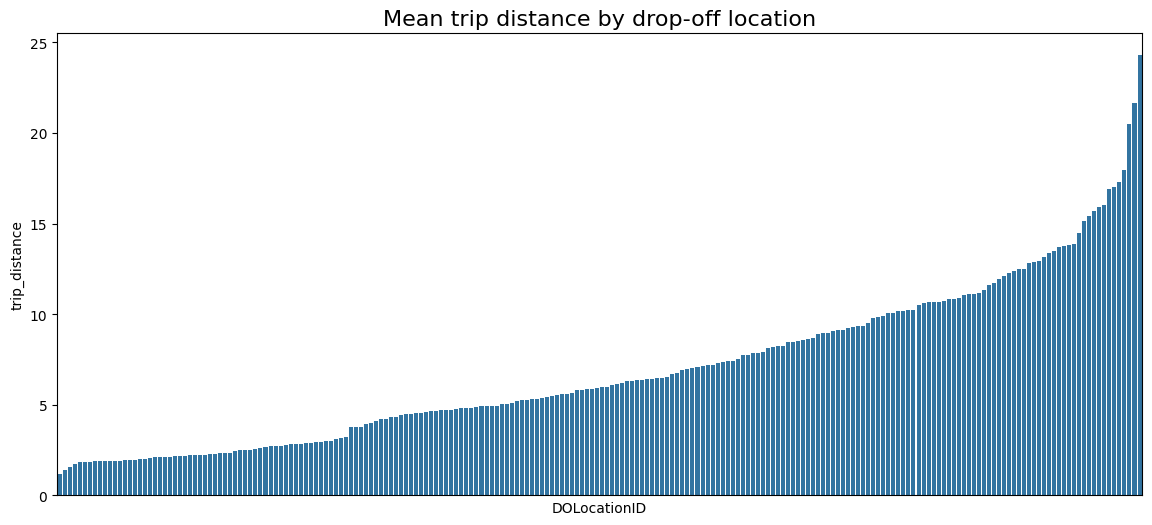

In [65]:
plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_by_dropoff.index, 
                 y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16);

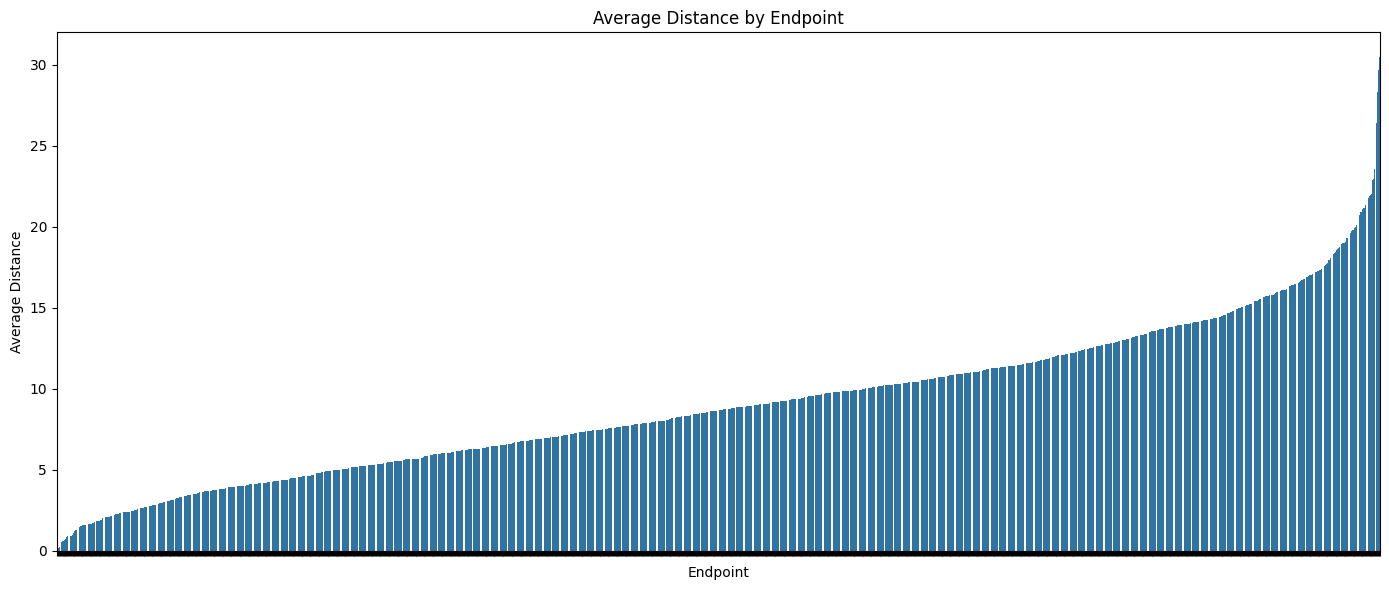

In [70]:
data = (
    test_df
    .groupby('end', as_index=False)['distance']
    .mean()
    .sort_values('distance')
)

data['end_str'] = data['end'].astype(str)

plt.figure(figsize=(14, 6))
ax = sns.barplot(x='end_str', y='distance', data=data, order=data['end_str'])
ax.set_xticklabels([], rotation=90)
ax.set_xlabel('Endpoint')
ax.set_ylabel('Average Distance')
plt.title('Average Distance by Endpoint')
plt.tight_layout()
plt.show()

In [71]:
df['DOLocationID'].max() - len(set(df['DOLocationID'])) 

np.int64(49)

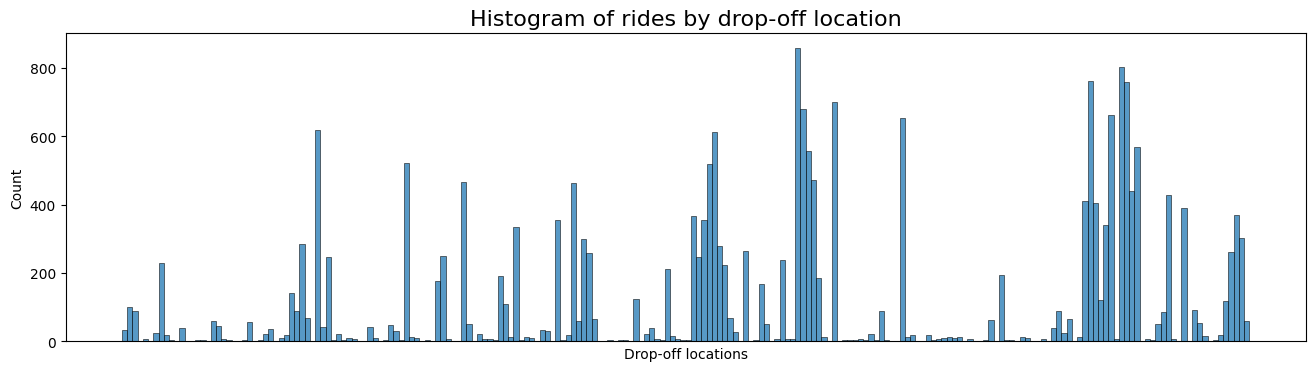

In [73]:
plt.figure(figsize=(16,4))
sorted_dropoffs = df['DOLocationID'].sort_values()
sorted_dropoffs = sorted_dropoffs.astype('str')
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);

In [74]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return data[(data[column] >= Q1 - 1.5 * IQR) & (data[column] <= Q3 + 1.5 * IQR)]
df_clean = remove_outliers_iqr(df, 'trip_distance')
df_clean = remove_outliers_iqr(df_clean, 'total_amount')
print(f"Original rows: {df.shape[0]}")
print(f"Cleaned rows: {df_clean.shape[0]}")
print(f"Removed rows: {df.shape[0] - df_clean.shape[0]}")


Original rows: 22699
Cleaned rows: 19562
Removed rows: 3137


In [75]:
df_clean['trip_duration'] = (pd.to_datetime(df_clean['tpep_dropoff_datetime']) - 
                             pd.to_datetime(df_clean['tpep_pickup_datetime'])).dt.total_seconds() / 60

df_clean['pickup_hour'] = pd.to_datetime(df_clean['tpep_pickup_datetime']).dt.hour

df_clean['pickup_dayofweek'] = pd.to_datetime(df_clean['tpep_pickup_datetime']).dt.day_name()

df_clean['pickup_month'] = pd.to_datetime(df_clean['tpep_pickup_datetime']).dt.month_name()

df_clean['average_speed_mph'] = df_clean['trip_distance'] / (df_clean['trip_duration'] / 60)

df_clean = df_clean[df_clean['trip_duration'] > 0]


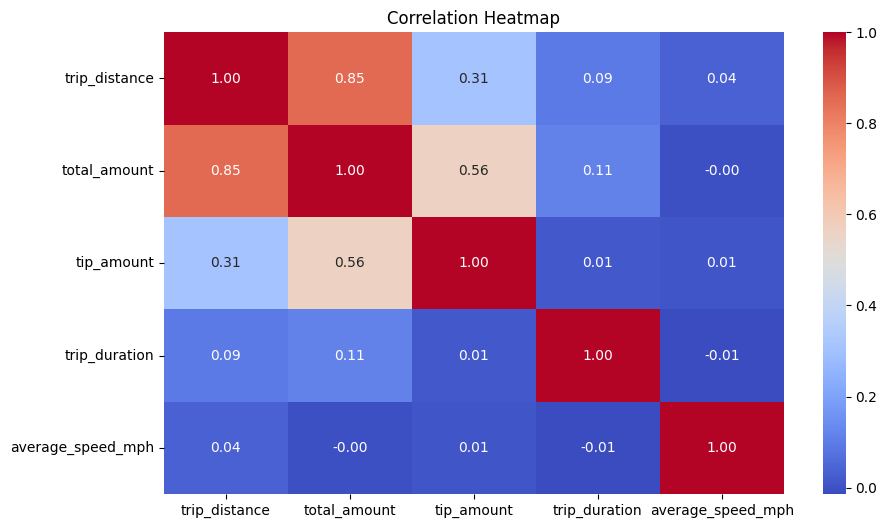

In [76]:
correlation_features = df_clean[[
    'trip_distance', 'total_amount', 'tip_amount',
    'trip_duration', 'average_speed_mph'
]]

corr_matrix = correlation_features.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\Chetna Chauhan\AppData\Local\Temp\ipykernel_15684\155551551.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_hour', data=df_clean, palette='crest')


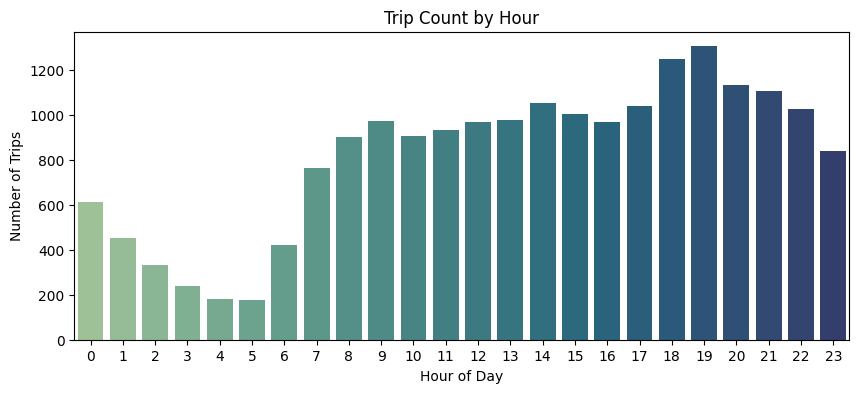

In [77]:
plt.figure(figsize=(10, 4))
sns.countplot(x='pickup_hour', data=df_clean, palette='crest')
plt.title("Trip Count by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.show()

C:\Users\Chetna Chauhan\AppData\Local\Temp\ipykernel_15684\4026264777.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='distance_bucket', y='total_amount', data=df_clean, estimator=sum, palette='viridis')


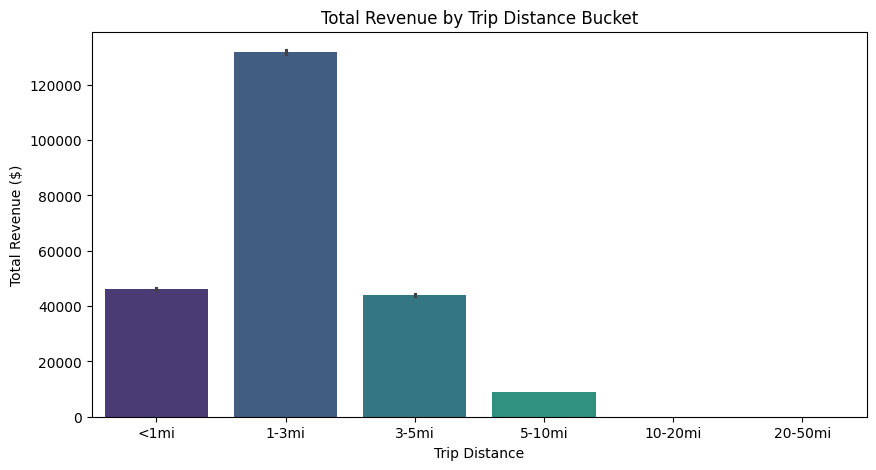

In [78]:
df_clean['distance_bucket'] = pd.cut(df_clean['trip_distance'],
    bins=[0, 1, 3, 5, 10, 20, 50],
    labels=['<1mi', '1-3mi', '3-5mi', '5-10mi', '10-20mi', '20-50mi']
)
plt.figure(figsize=(10, 5))
sns.barplot(x='distance_bucket', y='total_amount', data=df_clean, estimator=sum, palette='viridis')
plt.title("Total Revenue by Trip Distance Bucket")
plt.xlabel("Trip Distance")
plt.ylabel("Total Revenue ($)")
plt.show()

In [79]:
pickup_counts = df['PULocationID'].value_counts().head(10)
dropoff_counts = df['DOLocationID'].value_counts().head(10)

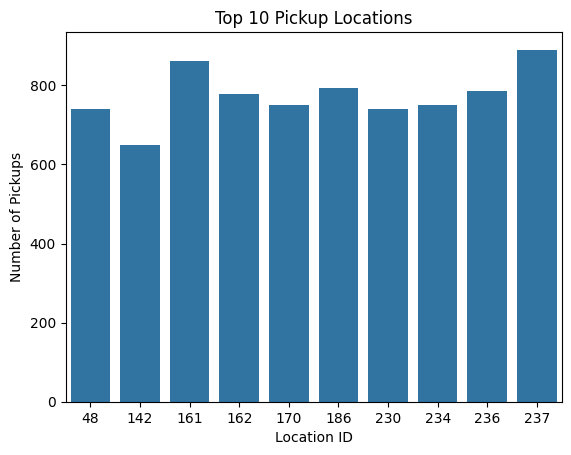

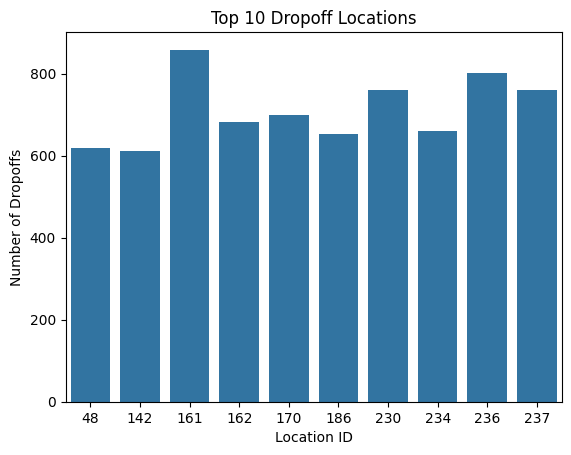

In [80]:
sns.barplot(x=pickup_counts.index, y=pickup_counts.values)
plt.title("Top 10 Pickup Locations")
plt.xlabel("Location ID")
plt.ylabel("Number of Pickups")
plt.show()
sns.barplot(x=dropoff_counts.index, y=dropoff_counts.values)
plt.title("Top 10 Dropoff Locations")
plt.xlabel("Location ID")
plt.ylabel("Number of Dropoffs")
plt.show()

In [84]:
# ─────────────────────────────────────────────────────────────
# 📝 EDA Summary: NYC Yellow Taxi Dataset
# ─────────────────────────────────────────────────────────────

# ✅ Data Cleaning:
# - Converted datetime columns and extracted useful features (hour, day, weekday, month)
# - Removed rows with missing or invalid values (~3137 removed)
# - Calculated trip durations in minutes for better analysis

# ⏱ Trip Duration:
# - Majority of trips are 5–25 minutes
# - Long outliers exist but are rare

# 📈 Temporal Patterns:
# - Peak ride hours: 8–10 AM and 5–7 PM (commute times)
# - Friday and Saturday have the highest ride volumes
# - Revenue is fairly consistent across months, but:
#     → Highest revenue: May, March, October
#     → Lowest revenue: July, August
#     → December shows higher tip percentage

# 💰 Tip Analysis:
# - Vendor 2 receives more total and average tip than Vendor 1
# - Groups of 3–4 passengers give the highest average tips
# - Tip amount increases with trip fare but varies with vendor and month

# 📍 Location Insights:
# - Most common Pickup IDs: 237, 161, 186
# - Most common Drop-off IDs: 161, 236, 237
# - Airport zones (like JFK, LGA) have the longest mean trip distances
# - Average trip distance ~2.5–3 miles

# 📊 Other Findings:
# - Drop-off location distribution is highly skewed (few zones dominate)
# - Good foundation for route optimization, pricing strategy, or dashboarding

# 🧠 Ready For:
# - Predictive modeling, route optimization, seasonal analysis
# - Power BI/Tableau dashboards or app integration

# ─────────────────────────────────────────────────────────────
